# Ninja 

This one is a bit different, its a practice room but not CTF. Why Ninja? Time to pull out your google-fu.



## Brute Forcing

Not really the idea of the room.. I think..., but I'm interested in grep-ing skills for this attempt (as mine may or may not be very good).

### Get all File Locations & get rights
First get a list of where all the files are.

> find / -type f -name "8V2L" -o -name "bny0" -o -name "c4ZX" -o -name "D8B3" -o -name "FHl1" -o -name "oiMO" -o -name "PFbD" -o -name "rmfX" -o -name "SRSq" -o -name "uqyw" -o -name "v2Vb" -o -name "X1Uy" 2>/dev/null

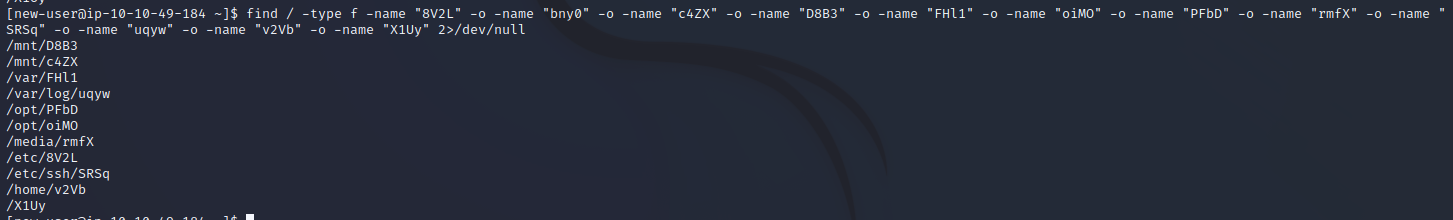<br>

Piping to xargs lets us run this on all the found files

> find / -type f -name "8V2L" -o -name "bny0" -o -name "c4ZX" -o -name "D8B3" -o -name "FHl1" -o -name "oiMO" -o -name "PFbD" -o -name "rmfX" -o -name "SRSq" -o -name "uqyw" -o -name "v2Vb" -o -name "X1Uy" 2>/dev/null | xargs ls -lh

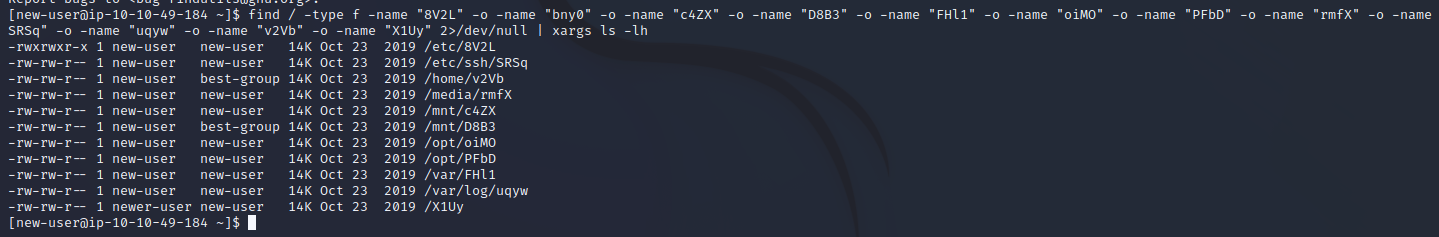<br>

Which also answers our first question, the last one, and with a bit of guess work, the 5th one<br>
<hr>

### Find an IP address
Next we need to find an IP address. Pipe it to grep instead to search. The -E allows Extended regex, so we can escape the . with a \. (a . is normally just any single character).

> find / -type f -name "8V2L" -o -name "bny0" -o -name "c4ZX" -o -name "D8B3" -o -name "FHl1" -o -name "oiMO" -o -name "PFbD" -o -name "rmfX" -o -name "SRSq" -o -name "uqyw" -o -name "v2Vb" -o -name "X1Uy" 2>/dev/null | xargs grep -E "\."

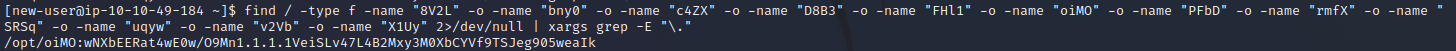<br>

We now have our file with an IP (which we can see was 1.1.1.1)<br>
<hr>

### SHA1 hash
We're on a roll. There is a built in script to calculate SHA1 (and other) hashes, so lets pipe there instead.

> find / -type f -name "8V2L" -o -name "bny0" -o -name "c4ZX" -o -name "D8B3" -o -name "FHl1" -o -name "oiMO" -o -name "PFbD" -o -name "rmfX" -o -name "SRSq" -o -name "uqyw" -o -name "v2Vb" -o -name "X1Uy" 2>/dev/null | xargs sha1sum

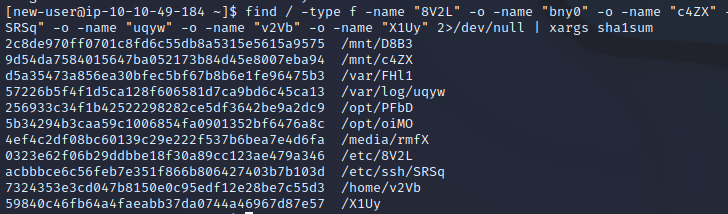<br>

give it a check :-)

<hr>

### Number of Lines
Now we have the line count, again its just where we pipe things. There is another built in command, wc, which will answer this for us. -l gives the number of lines

> find / -type f -name "8V2L" -o -name "bny0" -o -name "c4ZX" -o -name "D8B3" -o -name "FHl1" -o -name "oiMO" -o -name "PFbD" -o -name "rmfX" -o -name "SRSq" -o -name "uqyw" -o -name "v2Vb" -o -name "X1Uy" 2>/dev/null | xargs wc -l

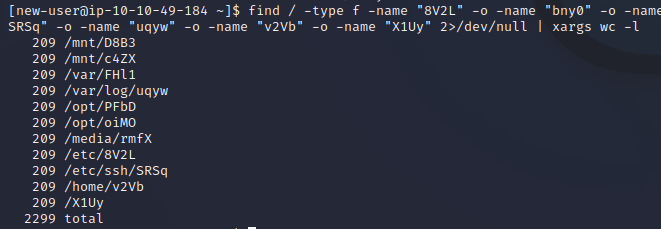<br>

Well it worked, but they are all 209... huh....<br>
Those of you that have been paying attention will notice there were 12 files, but we only got 11 in our find. Where did the "bny0" go?

- instead of a -name, try -iname (to make it case INsenstive), no joy there
- drop the -type f incase its a directory. Still no joy
- try follow symbolic links (-L before /), sits there spinning its wheels, pretty sure I got in an infinte loop...
- swap the 0 to a O, nothing